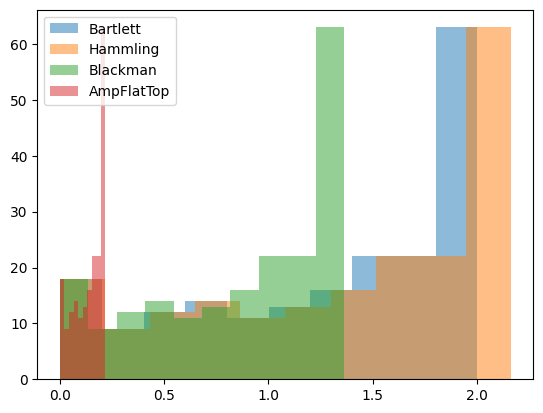

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 19 19:36:22 2022


@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

realizaciones=200#200 senoidales con 200 frec dif
N=1000
fs = 1000
ts=1/fs
Δf = fs/N # resolución espectral Δf
Amplitud=2
tt= np.linspace(0,(N-1)*ts,N)
Wbins=1
zerospadding=10
# --------------------------------------------

ff = np.arange(0,fs,fs/(N*(zerospadding+1)))
entrada=np.ones(N)
# ------WINDOWS----------
Bartlett=sig.windows.bartlett(N).reshape((N,1))#perform Bartlett's test 
Hamming = sig.windows.hamming(N).reshape((N,1))
Blackman= sig.windows.blackman(N).reshape((N,1))
FlatTop = sig.windows.flattop(N).reshape((N,1))


noise = (np.random.rand(1,realizaciones)-0.5)*2#ruido
# fr= np.random.rand(realiz,1)
# fr=fr-0.5
# fr=fr*4

tt= np.linspace(0,(N-1)*ts,N).reshape((N,1))#termina en (N-1)*ts con N muestras
#Genere la siguiente señal
Omega = (np.pi/2+noise*((np.pi*2/N)))*fs*tt
XX_sin= np.sin(Omega)*Amplitud
XX_fft_sin= np.fft.fft(XX_sin,axis=0)/XX_sin.shape[0]

XX_sin_Bartlett = XX_sin* Bartlett
XX_sin_Hamming = XX_sin* Hamming 
XX_sin_Blackman= XX_sin* Blackman
XX_sin_FlatTop = XX_sin* FlatTop

#Estimacion de la Amplitud Feta
# EstimacionAmplitud     = np.abs(XX_fft_sin[250,:])*2
EstimacionAmpBartlett  = np.abs(XX_sin_Bartlett[250,:])*2#too many indices for array: array is 1-dimensional, but 2 were indexed
EstimacionAmpHamming   = np.abs(XX_sin_Hamming[250,:])*2
EstimacionAmpBlackman  = np.abs(XX_sin_Blackman[250,:])*2
EstimacionAmpFlatTop   = np.abs(XX_sin_FlatTop[250,:])*2

plt.clf()
plt.figure(1)
kwargs =  dict(alpha=0.5, bins=10, density=False, stacked=True)
plt.hist(EstimacionAmpBartlett, **kwargs,  label='Bartlett')
plt.hist(EstimacionAmpHamming, **kwargs,  label='Hammling')
plt.hist(EstimacionAmpBlackman, **kwargs,  label='Blackman')
plt.hist(EstimacionAmpFlatTop, **kwargs,  label='AmpFlatTop')
plt.legend('EstimacionAmp')

# DensidadDePotencia         = np.abs(XX_fft_sin)**2
DensidadDePotenciaBartlett = 2*np.abs(XX_sin_Bartlett)**2
DensidadDePotenciaHamming= 2*np.abs(XX_sin_Hamming)**2
DensidadDePotenciaBlackman = 2*np.abs(XX_sin_Blackman)**2
DensidadDePotenciaFlatTop = 2*np.abs(XX_sin_FlatTop)**2

# sub_matriz          = DensidadDePotencia[250-Wbins:250+Wbins+1,:]
sub_matriz_Bartlett = DensidadDePotenciaBartlett[250-Wbins:250+Wbins+1,:]
sub_matriz_Hamming  = DensidadDePotenciaHamming[250-Wbins:250+Wbins+1,:]
sub_matriz_Blackman = DensidadDePotenciaBlackman[250-Wbins:250+Wbins+1,:]
sub_matriz_FlatTop  = DensidadDePotenciaFlatTop[250-Wbins:250+Wbins+1,:]

#Potencia Estimada
# Potencia_estimada=np.sum(sub_matriz)
Potencia_estimada_Bartlett=np.sum(sub_matriz_Bartlett,axis=0)
Potencia_estimada_Hamming=np.sum(sub_matriz_Hamming)
Potencia_estimada_Blackman=np.sum(sub_matriz_Blackman)
Potencia_estimada_FlatTop=np.sum(sub_matriz_FlatTop)

# AmplitudEstimada= np.sqrt(2*Potencia_estimada)
AmplitudEstimadaBartlett = np.sqrt(2*Potencia_estimada_Bartlett)
AmplitudEstimadaHamming  = np.sqrt(2*Potencia_estimada_Hamming)
AmplitudEstimadaBlackman = np.sqrt(2*Potencia_estimada_Blackman)
AmplitudEstimadaFlatTop  = np.sqrt(2*Potencia_estimada_FlatTop)
# Estimadores=np.hstack([EstimacionAmplitud,AmplitudEstimada]).transpose()#concatena vertical
EstimadoresBartlett=np.hstack([EstimacionAmpBartlett,AmplitudEstimadaBartlett]).transpose()#concatena vertical
EstimadoresHammling=np.hstack([EstimacionAmpHamming,AmplitudEstimadaHamming]).transpose()#concatena vertical
EstimadoresBlackman=np.hstack([EstimacionAmpBlackman,AmplitudEstimadaBlackman]).transpose()#concatena vertical
EstimadoresFlatTop=np.hstack([EstimacionAmpFlatTop,AmplitudEstimadaFlatTop]).transpose()#concatena vertical

#Bartlett
MedianaBartlett=np.median(EstimadoresBartlett)
SesgoBartlett=np.median(EstimadoresBartlett,axis=0)-Amplitud#
VarianzaBartlett= np.median(EstimadoresBartlett-MedianaBartlett )**2

#Hammling
MedianaHammling=np.median(EstimadoresHammling)
SesgoHammling=np.median(EstimadoresHammling,axis=0)-Amplitud#
VarianzaHammling= np.median(EstimadoresHammling-MedianaHammling )**2

#Blackman
MedianaBlackman=np.median(EstimadoresBlackman)
SesgoBlackman=np.median(EstimadoresBlackman,axis=0)-Amplitud#
VarianzaBlackman= np.median(EstimadoresBlackman-MedianaBlackman )**2

#FlatTop
MedianaFlatTop=np.median(EstimadoresFlatTop)
SesgoFlatTop=np.median(EstimadoresFlatTop,axis=0)-Amplitud#
VarianzaFlatTop= np.median(EstimadoresFlatTop-MedianaFlatTop )**2

ff = np.arange(0,fs,Δf)
bfrec= ff <= fs/2
#ploteo
# plt.plot(ff[ff<=fs/2],(2*np.abs(XX_fft_sin[ff<=fs/2,:])**2))
# estimacion_amp=np.abs(XX_fft_sin[250,:])*2
# plt.clf()
# plt.figure(1)
# kwargs =  dict(alpha=0.5, bins=10, density=False, stacked=True)
# plt.hist(EstimadoresBartlett, **kwargs,  label='Bartlett')
# plt.hist(EstimadoresHammling, **kwargs,  label='Hammling')
# plt.hist(EstimadoresBlackman, **kwargs,  label='Blackman')
# plt.hist(EstimadoresFlatTop , **kwargs,  label='FlatTop')
plt.legend()

#Histograma
# fig,ax=plt.subplots(nrows=1,ncols=1)
# plt.figure(2)
# ax.hist(Estimadores)

# Medianas=np.median(Estimadores,axis=0)
# Sesgo=np.median(Estimadores,axis=0)-Amplitud#-0.6778846
# Varianza= np.median(Estimadores-Medianas )**2

#

# df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
#                index=[  
#                         'Rectangular',
#                         'Bartlett',
#                         'Hann',
#                         'Blackman',
#                         'Flat-top'
#                      ])
# HTML(df.to_html())

#flat top es para medir energia

# para achicar la varianza, hay que trabajar sobre el estimador"aumentando el ancho de banda"

# bfrec = ff <= fs/2#variable de direccionamiento
# plt.plot(ff[ff <= fs/2],(2*np.abs(FFT_sin[ff <= fs/2,:])**2))

# plt.plot(ff[bfrec],20*np.log10(2*np.abs(FFT_sin[bfrec,:])**2),'g')

#mientras menos varianza sea, mejor es el estimador

In [ ]:
#Se plotea El punto 3.a